In [10]:
# Шаг 1: Загрузка данных и подготовка данных

In [11]:
import numpy as np
import pandas as pd

# Загрузка данных
dataset1 = pd.read_csv('dataset_1.csv')

# Добавление категорий для времени загрузки
bins = [0, 2, float('inf')]
labels = ['быстрый', 'медленный']
dataset1['load_category'] = pd.cut(dataset1['Load Time(s)'], bins=bins, labels=labels)

# Преобразование категорий в числовой формат
category_mapping = {'быстрый': 0, 'медленный': 1}
dataset1['load_category'] = dataset1['load_category'].map(category_mapping)

# Проверка наличия пропущенных значений в load_category
print(f"Пропущенные значения в load_category:\n{dataset1['load_category'].isnull().sum()}")

# Удаление строк с пропущенными значениями в load_category
dataset1 = dataset1.dropna(subset=['load_category'])

# Разделение на признаки и целевую переменную
X1 = dataset1[['Load Time(s)']]
y1 = dataset1['load_category']

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Применение SMOTE для сбалансирования классов
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train1_resampled, y_train1_resampled = smote.fit_resample(X_train1, y_train1)

# Проверка распределения классов после SMOTE
print("\nРаспределение классов после SMOTE:")
print(pd.Series(y_train1_resampled).value_counts())

# Проверка размеров выборок
print(f"\nРазмеры обучающей выборки после SMOTE: {X_train1_resampled.shape}")
print(f"Размеры тестовой выборки: {X_test1.shape}")

# Преобразование категориальных данных в числовой формат
y_train1 = y_train1.astype('int')  # Преобразуем обучающую выборку
y_test1 = y_test1.astype('int')    # Преобразуем тестовую выборку

# Проверка типов данных
print(X_train1.dtypes)
print(y_train1.dtype)

Пропущенные значения в load_category:
447

Распределение классов после SMOTE:
load_category
0    202
1    202
Name: count, dtype: int64

Размеры обучающей выборки после SMOTE: (404, 1)
Размеры тестовой выборки: (58, 1)
Load Time(s)    float64
dtype: object
int32


C:\Users\vlad4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [12]:
# Шаг 2: Построение и обучение модели

Метрики классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         8

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Точность модели: 1.00


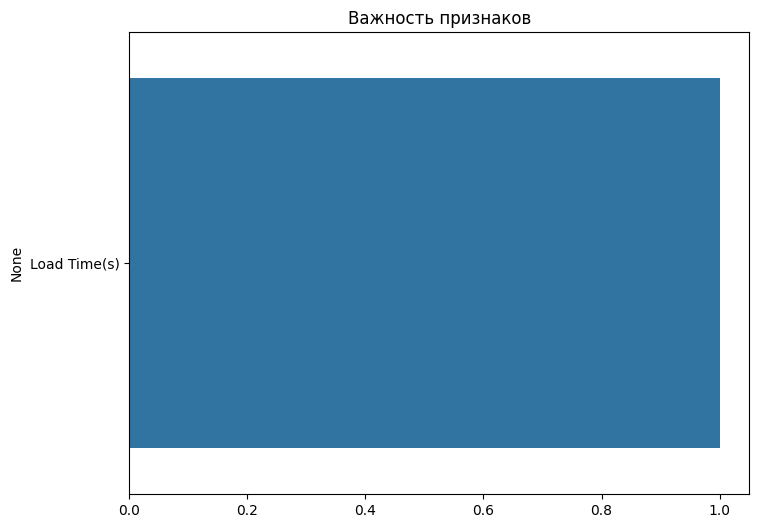

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Метрики классификации с лучшей моделью после GridSearchCV:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         8

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Точность с лучшей моделью: 1.00


In [13]:
# Импорт необходимых библиотек
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Построение модели
model1 = RandomForestClassifier(random_state=42)

# Обучение модели
model1.fit(X_train1_resampled, y_train1_resampled)

# Оценка модели на тестовой выборке
y_pred1 = model1.predict(X_test1)

# Вывод метрик классификации
print("Метрики классификации на тестовой выборке:")
print(classification_report(y_test1, y_pred1))

# Оценка точности
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Точность модели: {accuracy:.2f}")

# Визуализация важности признаков
feature_importances = model1.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X_train1.columns)
plt.title("Важность признаков")
plt.show()

# Проведение настройки гиперпараметров с помощью GridSearchCV (опционально)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train1_resampled, y_train1_resampled)

# Лучшая модель после GridSearchCV
best_model1 = grid_search.best_estimator_

# Оценка модели с лучшими гиперпараметрами
y_pred_best = best_model1.predict(X_test1)
print("Метрики классификации с лучшей моделью после GridSearchCV:")
print(classification_report(y_test1, y_pred_best))

# Оценка точности с лучшими гиперпараметрами
accuracy_best = accuracy_score(y_test1, y_pred_best)
print(f"Точность с лучшей моделью: {accuracy_best:.2f}")

In [22]:
import tensorflow as tf
# Сохранение первой модели
model1.save("model1.keras")

print("Первая модель успешно сохранена в формате keras!")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [19]:
# Шаг 3: Вывод текстовых рекомендаций

In [20]:
import joblib

#Загрузка обученной модели
model_path = 'model1.pkl'
model1 = joblib.load(model_path)

def generate_recommendation(predicted_class, load_time):
    recommendations = {
        0: {
            "message": "Ваш сайт загружается быстро. Отличная работа!",
            "advice": "Для дальнейшего улучшения производительности минимизируйте количество HTTP-запросов и используйте кэширование."
        },
        1: {
            "message": "Ваш сайт загружается медленно. Это может повлиять на пользовательский опыт.",
            "advice": "Рекомендуем оптимизировать изображения, использовать асинхронную загрузку ресурсов и уменьшить время отклика сервера."
        }
    }
    
    if load_time < 2:
        return f"{recommendations[0]['message']} {recommendations[0]['advice']}"
    elif 2 <= load_time < 4:
        return f"{recommendations[1]['message']} {recommendations[1]['advice']}"
    else:
        return f"{recommendations[1]['message']} {recommendations[1]['advice']} Проверьте качество хостинга и оптимизацию серверных настроек."

# Тестовый пример
sample_load_time = pd.DataFrame([[4.5]], columns=['Load Time(s)'])
predicted_class = model1.predict(sample_load_time)[0]

# Вывод рекомендации
print(f"Рекомендация: {generate_recommendation(predicted_class, sample_load_time['Load Time(s)'][0])}")

Рекомендация: Ваш сайт загружается медленно. Это может повлиять на пользовательский опыт. Рекомендуем оптимизировать изображения, использовать асинхронную загрузку ресурсов и уменьшить время отклика сервера. Проверьте качество хостинга и оптимизацию серверных настроек.
